1.take a imbalanced data
2.data preprocessing
3.train the model using knn
4.evalutaion metrics
5.andle the imbalanced data using SMOTE technique
6.again train the model using knn
7.evalutaion metrics after handling


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns

In [3]:
data=pd.read_csv("car_evaluation.csv")

In [4]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
outcome     0
dtype: int64

In [7]:
data.shape

(1728, 7)

In [8]:
data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'outcome'], dtype='object')

In [9]:
data.describe()

,doors,persons
count,1728.000000,1728.000000
mean,3.500000,3.989583
std,1.118358,1.627039
min,2.000000,2.000000
25%,2.750000,2.000000
50%,3.500000,4.000000
75%,4.250000,6.000000
max,5.000000,6.000000


In [10]:
#handle null----no null

In [11]:
data.outcome.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: outcome, dtype: int64

/var/folders/r4/ktl12csj7993r4p4qm508lr00000gn/T/ipykernel_24710/1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

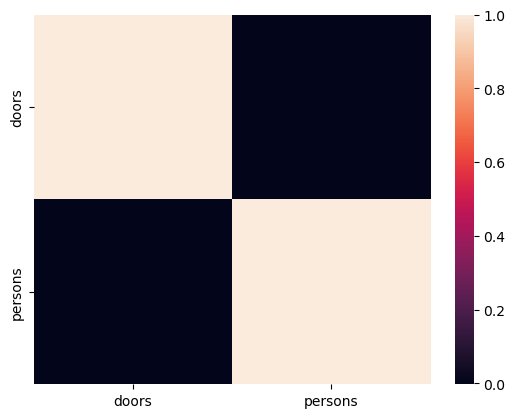

In [12]:
sns.heatmap(data.corr())

<Axes: ylabel='outcome'>

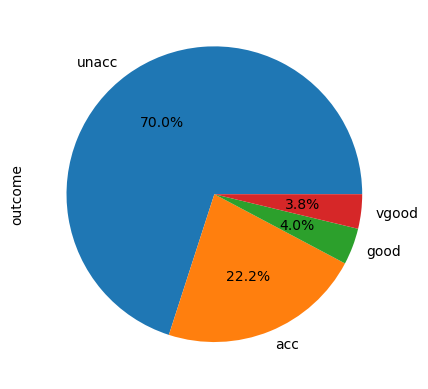

In [14]:
data.outcome.value_counts().plot(kind="pie",autopct="%1.1f%%")

In [ ]:
Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()

In [18]:
columns=["buying","maint","lug_boot","safety"]

In [19]:
data[columns]=data[columns].apply(le.fit_transform)

In [20]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,3,3,2,2,2,1,unacc
1,3,3,2,2,2,2,unacc
2,3,3,2,2,2,0,unacc
3,3,3,2,2,1,1,unacc
4,3,3,2,2,1,2,unacc


In [ ]:
splitting dependent and independent variables

In [21]:
x=data.drop(columns="outcome")
y=data["outcome"]

In [22]:
x.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,2,2,2,1
1,3,3,2,2,2,2
2,3,3,2,2,2,0
3,3,3,2,2,1,1
4,3,3,2,2,1,2


In [24]:
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: outcome, dtype: object

In [26]:
type(x)

pandas.core.frame.DataFrame

In [ ]:
train test split

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [31]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1382, 6), (346, 6), (1382,), (346,))

In [ ]:
model building

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn=KNeighborsClassifier()

In [35]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [36]:
y_pred=knn.predict(x_test)

In [41]:
y_pred


array(['unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'good', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc',
       'acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc',
       'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'acc',
       'acc', 'unacc', 'unacc', 'acc', 'good', 'unacc', 'vgood', 'acc',


In [38]:
y_test

1318    unacc
124     unacc
648     unacc
249     unacc
1599    unacc
        ...  
1481    vgood
1327    unacc
317       acc
142     unacc
427       acc
Name: outcome, Length: 346, dtype: object

In [ ]:
random value prediction

In [43]:
knn.predict([[3,3,2,2,2,1]])

/Users/vatsalvishalshah/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['unacc'], dtype=object)

In [48]:
knn.predict([[1,1,5,6,0,2]])

/Users/vatsalvishalshah/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['good'], dtype=object)

In [49]:
from sklearn.metrics import accuracy_score,classification_report

In [50]:
accuracy_score(y_pred,y_test)

0.9075144508670521

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         acc       0.80      0.81      0.81        79
        good       0.67      0.24      0.35        17
       unacc       0.95      0.99      0.97       240
       vgood       0.89      0.80      0.84        10

    accuracy                           0.91       346
   macro avg       0.83      0.71      0.74       346
weighted avg       0.90      0.91      0.90       346



In [52]:
pd.crosstab(y_test,y_pred)

col_0,acc,good,unacc,vgood
outcome,,,,
acc,64,2,12,1
good,12,4,1,0
unacc,2,0,238,0
vgood,2,0,0,8


In [ ]:
handle the imbalanced data and buil our model

In [56]:
!pip install imblearn

In [59]:
conda install -c conda-forge imbalanced-learn

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
/ DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/noarch/current_repodata.json HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/osx-arm64/current_repodata.json HTTP/1.1" 200 None
| DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
/ DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/osx-arm64/current_repodata.json HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/noarch/current_repodata.json HTTP/1.1" 200 None
\ DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 

In [63]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)
y_train.value_counts()


ImportError: cannot import name '_check_X' from 'imblearn.utils._validation' (/Users/vatsalvishalshah/anaconda3/lib/python3.11/site-packages/imblearn/utils/_validation.py)

In [64]:
y_train_smote.value_counts()
from sklearn.neighbors import KNeighborsClassifier
knn_smote=KNeighborsClassifier()
knn_smote.fit(x_train_smote,y_train_smote)

NameError: name 'y_train_smote' is not defined